## What are the most optimal skills to learn for Data Jobs in Germany?

In [8]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go 
from plotly.subplots import make_subplots
from plot_utils import save_plot_for_github

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else(x))

In [9]:
# Filtering Data for Germany and Non-null Salaries
df_Germany = df[df['job_country'] == 'Germany']
df_Germany_with_salary = df_Germany[df_Germany['salary_year_avg'].notnull()].copy()

# Including Top 7 Job Titles
job_titles = df_Germany_with_salary['job_title_short'].value_counts().index[:7].tolist()
job_titles

['Data Analyst',
 'Data Scientist',
 'Data Engineer',
 'Machine Learning Engineer',
 'Senior Data Engineer',
 'Senior Data Scientist',
 'Senior Data Analyst']

5.1. Creating dataframe with exploded job skills data

In [10]:
df_Germany_with_salary_exploded = df_Germany_with_salary.explode('job_skills')
df_Germany_with_salary_exploded[['salary_year_avg', 'job_skills']].head(10)

,salary_year_avg,job_skills
1363,56700.0,spark
7772,199675.0,spark
10610,147500.0,go
10610,147500.0,redshift
10610,147500.0,snowflake
10610,147500.0,aws
10610,147500.0,gdpr
10610,147500.0,hadoop
10610,147500.0,spark
10610,147500.0,kafka


In [11]:
# Analyzing top skills by frequnecy and median salary
df_Germany_skills = df_Germany_with_salary_exploded.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)
df_Germany_skills = df_Germany_skills.rename(columns={'count': 'skill_count', 'median': 'skill_median_salary'})
df_Germany_skills.head(10)

,skill_count,skill_median_salary
job_skills,,
python,138,115883.00
sql,106,111175.00
spark,74,147500.00
aws,50,147500.00
azure,36,104738.25
tableau,29,105000.00
airflow,24,147500.00
git,21,120564.00
go,21,111175.00


In [12]:
# Calculating percentages of skills occurrence
df_Germany_count = len(df_Germany_with_salary)
df_Germany_skills['skill_percent'] = df_Germany_skills['skill_count'] / df_Germany_count * 100
df_Germany_skills.head(10)

,skill_count,skill_median_salary,skill_percent
job_skills,,,
python,138,115883.00,53.696498
sql,106,111175.00,41.245136
spark,74,147500.00,28.793774
aws,50,147500.00,19.455253
azure,36,104738.25,14.007782
tableau,29,105000.00,11.284047
airflow,24,147500.00,9.338521
git,21,120564.00,8.171206
go,21,111175.00,8.171206


5.2. Including skills that appear in over 7% of job postings

In [13]:
skill_percent = 7
df_Germany_skills_high_demand = df_Germany_skills[df_Germany_skills['skill_percent'] > skill_percent]
df_Germany_skills_high_demand

,skill_count,skill_median_salary,skill_percent
job_skills,,,
python,138,115883.00,53.696498
sql,106,111175.00,41.245136
spark,74,147500.00,28.793774
aws,50,147500.00,19.455253
azure,36,104738.25,14.007782
tableau,29,105000.00,11.284047
airflow,24,147500.00,9.338521
git,21,120564.00,8.171206
go,21,111175.00,8.171206


5.3. Plotting simple scatter plot for better understanding

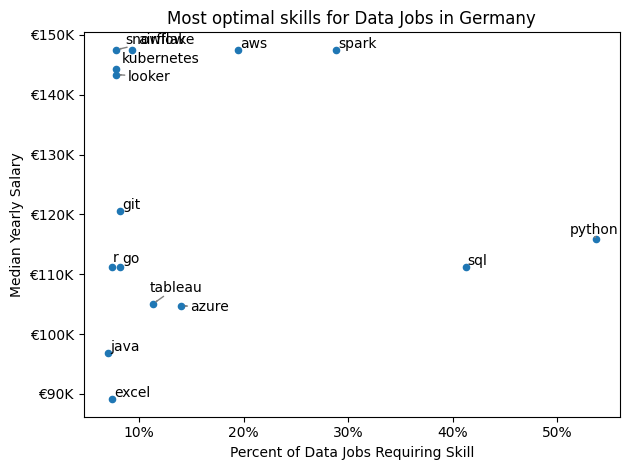

In [14]:
from adjustText import adjust_text
df_Germany_skills_high_demand.plot(kind='scatter', x='skill_percent', y='skill_median_salary')
texts = []

for i, txt in enumerate(df_Germany_skills_high_demand.index):
    texts.append(plt.text(df_Germany_skills_high_demand['skill_percent'].iloc[i], df_Germany_skills_high_demand['skill_median_salary'].iloc[i], txt))
adjust_text(texts, arrowprops=dict(arrowstyle="->", color='grey', lw=1))

plt.xlabel('Percent of Data Jobs Requiring Skill')
plt.ylabel('Median Yearly Salary')
plt.title(f'Most optimal skills for Data Jobs in Germany')

from matplotlib.ticker import PercentFormatter, FuncFormatter
ax = plt.gca()
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, pos: f'€{int(y/1000)}K'))
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, pos: f'{x:.0f}%'))

plt.tight_layout()
plt.show()

In [15]:
df['job_type_skills'].head(10)

0                                                  NaN
1    {'analyst_tools': ['power bi', 'tableau'], 'pr...
2    {'analyst_tools': ['dax'], 'cloud': ['azure'],...
3    {'cloud': ['aws'], 'libraries': ['tensorflow',...
4    {'cloud': ['oracle', 'aws'], 'other': ['ansibl...
5    {'cloud': ['gcp'], 'programming': ['python', '...
6    {'cloud': ['gcp', 'bigquery'], 'databases': ['...
7    {'cloud': ['gcp', 'azure', 'aws', 'bigquery', ...
8    {'analyst_tools': ['excel', 'powerpoint', 'pow...
9    {'analyst_tools': ['excel'], 'cloud': ['azure'...
Name: job_type_skills, dtype: str

In [16]:
# Extracting and Aggregating Technology Skills
df_technology = df['job_type_skills'].copy()
df_technology = df_technology.drop_duplicates()
df_technology = df_technology.dropna()

technology_dict = {}
for types in df_technology:
    types_dict = ast.literal_eval(types)
    for key, value in types_dict.items():
        if key in technology_dict:
            technology_dict[key] += value
        else:
                technology_dict[key] = value

for key, value in technology_dict.items():
    technology_dict[key] = list(set(value))

technology_dict

{'analyst_tools': ['powerpoint',
  'powerbi',
  'msaccess',
  'esquisse',
  'sheets',
  'datarobot',
  'cognos',
  'ssis',
  'ssrs',
  'sap',
  'power bi',
  'ms access',
  'excel',
  'qlik',
  'dax',
  'microstrategy',
  'outlook',
  'sas',
  'spss',
  'looker',
  'spreadsheet',
  'nuix',
  'alteryx',
  'visio',
  'splunk',
  'word',
  'tableau',
  'sharepoint'],
 'programming': ['powershell',
  'elixir',
  'assembly',
  'erlang',
  'f#',
  'vb.net',
  'pascal',
  'python',
  'groovy',
  'julia',
  'ocaml',
  'solidity',
  'visualbasic',
  'r',
  'javascript',
  'nosql',
  'apl',
  'css',
  'ruby',
  'lua',
  'c#',
  'shell',
  'typescript',
  'rust',
  'sass',
  'haskell',
  'html',
  'matlab',
  'crystal',
  'dart',
  'fortran',
  'php',
  't-sql',
  'cobol',
  'sql',
  'perl',
  'kotlin',
  'bash',
  'golang',
  'sas',
  'java',
  'scala',
  'swift',
  'c++',
  'objective-c',
  'delphi',
  'c',
  'mongo',
  'clojure',
  'visual basic',
  'mongodb',
  'vba',
  'go',
  'lisp',
  'no-

5.3. Creating dataframe which asigns type of technology to the particular skill

In [17]:
df_technology = pd.DataFrame(list(technology_dict.items()), columns=['technology', 'skills'])

In [18]:
df_technology = df_technology.explode('skills')
df_technology

,technology,skills
0,analyst_tools,powerpoint
0,analyst_tools,powerbi
0,analyst_tools,msaccess
0,analyst_tools,esquisse
0,analyst_tools,sheets
...,...,...
9,sync,wire
9,sync,mattermost
9,sync,slack
9,sync,microsoft teams


In [19]:
# Merging High Demand Skills with Technology Skills
df_plot = df_Germany_skills_high_demand.merge(df_technology, left_on='job_skills', right_on='skills')

5.4. Creating scatter plot representing most optimal skills for Data Job market in Germany

Saved: docs/images/5.1. Optimal Skills for Data Jobs in Germany.png.png (static) and docs/images/5.1. Optimal Skills for Data Jobs in Germany.png.html (interactive)


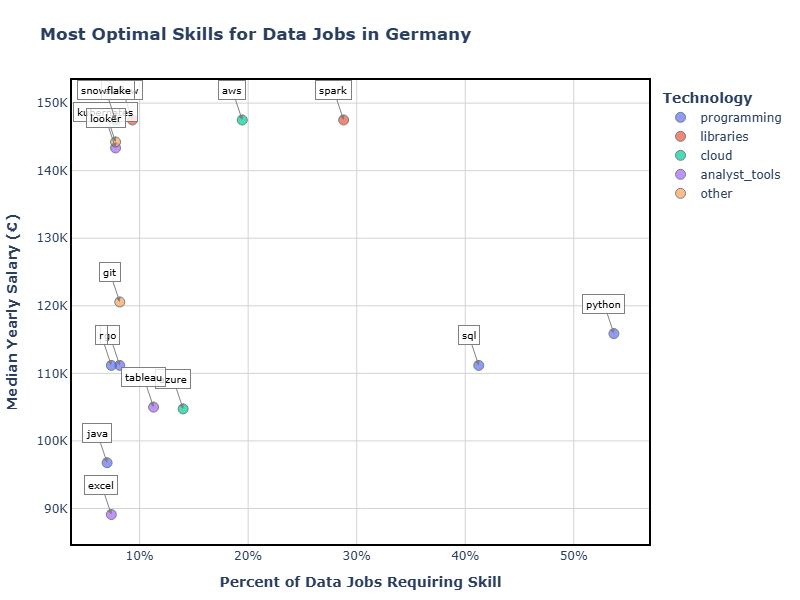

('docs/images/5.1. Optimal Skills for Data Jobs in Germany.png.png',
 'docs/images/5.1. Optimal Skills for Data Jobs in Germany.png.html')

In [20]:
df_plot = df_plot.copy()
df_plot['skill_name'] = df_Germany_skills_high_demand.index.tolist()

# Creating Scatter Plot with Plotly
fig = px.scatter(
    df_plot,
    x='skill_percent',
    y='skill_median_salary',
    color='technology',
    hover_name='skill_name', 
    title='<b>Most Optimal Skills for Data Jobs in Germany</b>'
)

# Updating marker style
fig.update_traces(
    marker=dict(size=10, opacity=0.7, line=dict(width=1, color='DarkSlateGrey')),
    selector=dict(mode='markers'),
    text='',
    hovertemplate=(
               '<b>%{hovertext}</b><br><br>' +
        'Required by % of Jobs: <b>%{x:.1f}%</b><br>' +
        'Median Salary: <b>€%{y:,.0f}</b><br>' +
        '<extra></extra>'
    ),
    hoverinfo='text'
)

# Adding text annotations with arrows
for i, row in df_Germany_skills_high_demand.iterrows():
    fig.add_annotation(
        x=row['skill_percent'],
        y=row['skill_median_salary'],
        text=i,  
        showarrow=True,
        arrowhead=2,
        arrowsize=1,
        arrowwidth=1,
        arrowcolor='grey',
        font=dict(size=10, color='black'),
        bgcolor='rgba(255, 255, 255, 0.8)',
        bordercolor='grey',
        borderwidth=1,
        borderpad=3
    )
fig.update_xaxes(
    title='<b>Percent of Data Jobs Requiring Skill</b>',
    tickformat=',.0f%',
    ticksuffix='%',  
    gridcolor='lightgrey',
    showgrid=True
)

fig.update_yaxes(
    title='<b>Median Yearly Salary (€)</b>',
    tickprefix='€',
    ticksuffix='K',
    tickformat=',.0f',  
    tickvals=[i*10000 for i in range(0, 21)],  
    ticktext=[f'{i*10}K' for i in range(0, 21)],  
    gridcolor='lightgrey',
    showgrid=True
)
fig.update_layout(
    plot_bgcolor='white',
    hovermode='closest',
    legend=dict(
        title='<b>Technology</b>',
        yanchor="top",
        y=0.99,
        xanchor="left",
        x=1.02,
        bgcolor='rgba(255, 255, 255, 0.8)'
    ),
    margin=dict(l=50, r=100, t=80, b=50),
    width=1000,
    height=600
)
fig.update_xaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_yaxes(showline=True, linewidth=2, linecolor='black', mirror=True)

save_plot_for_github(fig, '5.1. Optimal Skills for Data Jobs in Germany.png')